In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import PackedSelection
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import numba
import uproot 
#plt.style.use(hep.style.CMS)

In [2]:
redirector = {"hdfs":"/hdfs",
              "local":"",
              "global":"root://cms-xrd-global.cern.ch//",
              "infn":"root://xrootd-cms.infn.it//",
              "fermilab":"root://cmsxrootd.fnal.gov//",
             }
file = "/store/mc/RunIIAutumn18NanoAODv7/MonoHTobb_ZpBaryonic_TuneCP2_13TeV_madgraph-pythia8/NANOAODSIM/Nano02Apr2020_rp_102X_upgrade2018_realistic_v21-v1/10000/0EE0D641-EDAE-D547-ABAD-56D54B768C5B.root"
local_file = "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root"
filename= redirector["local"] + local_file

In [3]:
events = NanoEventsFactory.from_root(
    filename,
    schemaclass = NanoAODSchema.v7,
    metadata = {"Dataset":"HiggsTobbbarZprimeBaryonic","isMC":True},
    #entry_stop=10e5 ,
).events()
print("Number of events loaded : ", len(events))

Number of events loaded :  297347


In [4]:
selection = PackedSelection()
selection.add("pt25", ak.all(events.Jet.pt > 25, axis=1))
cuts = selection.all("pt25")
good_events = events[cuts]

/tmp/ipykernel_19176/1286507072.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


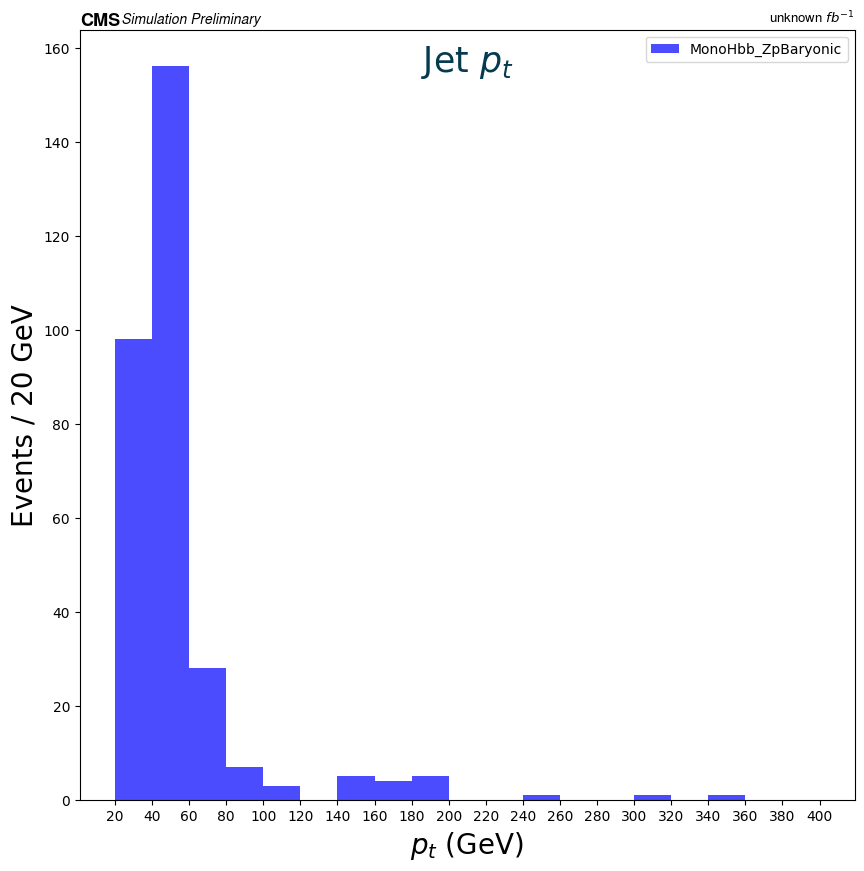

In [5]:
x_min = 20
x_max = 400
bin_size = 20
n_bins=int((x_max - x_min)/bin_size)
h = hist.Hist.new.Reg(n_bins,x_min,x_max).Double().fill(ak.flatten(good_events.Jet.pt))
fig , ax= plt.subplots(figsize=(10,10))
hep.histplot(h, 
             #bins=bins ,
             histtype="fill",
             color="b",
             alpha=0.7,
             edgecolor="black",
             label=r"MonoHbb_ZpBaryonic",
             ax=ax
            )
ax.set_title("Jet $p_t$", y=1.0, pad=-30, fontsize=25, color="#053B50")
ax.set_xlabel("$p_t$ (GeV)", fontsize=20)
ax.set_ylabel(f"Events / {bin_size} GeV", fontsize=20)
ax.set_xticks(np.arange(x_min,x_max+bin_size,bin_size))
hep.cms.label("Preliminary",data=False, rlabel="unknown $fb^{-1}$")
ax.legend()
fig.savefig("Result.jpg",dpi=300)
fig.show()

In [6]:
Jets = events.Jet[events.Jet.pt > 25]
btag_WP_medium = 0.3040
ak4_BJets_med = Jets[ Jets.btagDeepFlavB > btag_WP_medium ]

In [7]:
ak4_BJets_med[ak.num(ak4_BJets_med)>2]

<JetArray [[Jet, Jet, Jet], ... Jet, Jet, Jet]] type='237 * var * jet'>

In [8]:
@numba.jit(nopython = False)
def ObtainDiJets(Jets, ak4_BJets_med):
    Jets = Jets[ak.num(Jets)>1]
    DiJets = Jets[:,0]+Jets[:,1]
    ak4_BJets_med = ak4_BJets_med[ak.num(ak4_BJets_med)>2]
    DiJets_bb = ak4_BJets_med[:,0]+ak4_BJets_med[:1]
    return DiJets , DiJets_bb

/tmp/ipykernel_19176/1363687121.py:1: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython = False)


In [9]:
DiJets , DiJets_bb = ObtainDiJets(Jets, ak4_BJets_med)
DiJets.mass

/tmp/ipykernel_19176/1363687121.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "ObtainDiJets" failed type inference due to: Unknown attribute 'num' of type Module(<module 'awkward' from '/home/prayag/.local/lib/python3.10/site-packages/awkward/__init__.py'>)

File "../../../../../tmp/ipykernel_19176/1363687121.py", line 3:
<source missing, REPL/exec in use?>

During: typing of get attribute at /tmp/ipykernel_19176/1363687121.py (3)

File "../../../../../tmp/ipykernel_19176/1363687121.py", line 3:
<source missing, REPL/exec in use?>

  @numba.jit(nopython = False)
/home/prayag/.local/lib/python3.10/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "ObtainDiJets" was compiled in object mode without forceobj=True.

File "../../../../../tmp/ipykernel_19176/1363687121.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/prayag/.local/lib/python3.10/site-packag

<Array [83.4, 227, 673, 106, ... 151, 528, 81] type='189400 * float32'>

In [10]:
import json
with open("Kinematics/fileset.json") as f:
    files = json.load(f)
print(files["MC"])

{'MonoHbbZpBaryonic': ['root://cmsxrootd.fnal.gov///store/mc/RunIIAutumn18NanoAODv7/MonoHTobb_ZpBaryonic_TuneCP2_13TeV_madgraph-pythia8/NANOAODSIM/Nano02Apr2020_rp_102X_upgrade2018_realistic_v21-v1/00000/1171A356-937B-D346-B31E-D7397CD17A9E.root', 'root://cmsxrootd.fnal.gov///store/mc/RunIIAutumn18NanoAODv7/MonoHTobb_ZpBaryonic_TuneCP2_13TeV_madgraph-pythia8/NANOAODSIM/Nano02Apr2020_rp_102X_upgrade2018_realistic_v21-v1/00000/B92C3E7A-425A-2A40-812C-F733C1287C79.root', 'root://cmsxrootd.fnal.gov///store/mc/RunIIAutumn18NanoAODv7/MonoHTobb_ZpBaryonic_TuneCP2_13TeV_madgraph-pythia8/NANOAODSIM/Nano02Apr2020_rp_102X_upgrade2018_realistic_v21-v1/00000/D53C3745-8D33-D34A-8FA2-2B42E1AB5FB4.root', 'root://cmsxrootd.fnal.gov///store/mc/RunIIAutumn18NanoAODv7/MonoHTobb_ZpBaryonic_TuneCP2_13TeV_madgraph-pythia8/NANOAODSIM/Nano02Apr2020_rp_102X_upgrade2018_realistic_v21-v1/10000/0EE0D641-EDAE-D547-ABAD-56D54B768C5B.root', 'root://cmsxrootd.fnal.gov///store/mc/RunIIAutumn18NanoAODv7/MonoHTobb_ZpBary

In [11]:
JetHist= (
            hist.Hist.new.StrCat(["Untagged","btagDeepFlavB"], name="Type")
            .Reg(50,0.,500., name="pt", label="$p_t$ (GeV)")
            .Double()
            )
JetHist.fill(Type="Untagged", pt = ak.flatten(Jets.pt))
JetHist.fill(Type="btagDeepFlavB", pt = ak.flatten(ak4_BJets_med.pt))
Jetpt_Hist = JetHist

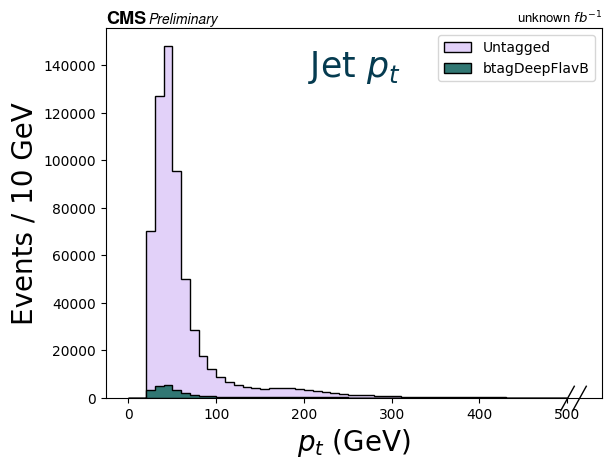

In [16]:
x_min = 0.
x_max = 500.
bin_size = 10
n_bins=int((x_max - x_min)/bin_size)
#bins = 
#fig , ax= plt.subplots(figsize=(10,10))
fig , ax = plt.subplots()
hep.histplot([ Jetpt_Hist["Untagged",:], Jetpt_Hist["btagDeepFlavB",:] ], 
             #stack=True ,
             #bins=bins ,
             histtype="fill",
             color=[ "#E2D1F9", "#317773" ],
             edgecolor="black",
             label=[ r"Untagged" , r"btagDeepFlavB"],
             lw=1,
             #density=True,
             #binticks=True ,
             ax=ax ,
             
            )
# hep.histplot(Jetpt_Hist["btagDeepFlavB",:], 
#              #bins=bins ,
#              histtype="fill",
#              color="r",
#              alpha=0.7,
#              edgecolor="black",
#              label=r"btagDeepFlavB",
#              ax=ax ,
#              stack=True
#             )
ax.set_title("Jet $p_t$", y=1.0, pad = -35 , fontsize=25, color="#053B50")
ax.set_xlabel("$p_t$ (GeV)", fontsize=20)
ax.set_ylabel(f"Events / {bin_size} GeV", fontsize=20)
ax.set_xticks(np.arange(x_min,x_max+bin_size,bin_size*10))
hep.cms.label("Preliminary",data = "Data", rlabel="unknown $fb^{-1}$")
ax.legend()